### Table of Contents

### 1. Import libraries and data
### 2. Create subsets of variables for exploratory visual analysis
### 3. Exploring relationships
##### 1. Correlations
###### 1. Public
###### 2. Private non-profit
##### 2. Scatterplots
###### 1. Public
###### 2. Private non-profit
##### 3. Pair plots
##### 4. Categorical plots
###### 1. Public
###### 2. Private non-profit
##### 5. Revisit questions
###### 1. Cost/price
###### 2. Admissions
###### 3. Students
##### 6. Possible hypotheses

# 01. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check version of matplotlib
matplotlib.__version__

'3.3.4'

In [3]:
# Ensure charts are displayed in the notebook
%matplotlib inline

In [4]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [6]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'scorecard_data_cleaned.pkl'))

In [7]:
# Check output
df.head()

UNITID    OPEID  OPEID6                                 NAME        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STATE         ZIP                                       ACCREDAGENCY  \
0    AL       35762  Southern Association of Colleges and Schools C...   
1    AL  35294-0110  Southern Association of Colleges and Schools C...   
2    AL  36117-3553  Southern Association of Colleges and Schools C...   
3    AL       35899  Southern Association of Colleges and Schools C...   
4    AL  36104-0271  Southern Association of Colleges and Schools C...   

   SCH_DEG  HCM2  ...   UG12MN    G12MN  SCUGFFN  POOLYRS_FTFTAIDPCT  \
0      3.0     0  ...   5343.0   1165.0   1288.0                 2.0   
1      3.0     0  ...  14445.0  10498.0   2228.0                 2.0   
2      3.0     0  ...    440.0    527.0      5.0                 4.0   
3      3.0     0  ...   8145.0   2443.0   1341.0                 2.0   
4      3.0     0  ...   4732.0    642.0    951.0                 2.0   

   FTFTPCTPELL_POOLED_SUPP  FTFTPCTFLOAN_POOLED_SUPP  SCUGFFN_POOLED  \
0                   0.7083                    0.7287          2698.0   
1                   0.3891                    0.5414          4176.0   
2                      NaN                       NaN            24.0   
3                   0.2378                    0.4402          2544.0   
4                   0.7684                    0.7464          2094.0   

   LPSTAFFORD_CNT  LPSTAFFORD_AMT  FEDSCHCD  
0         31374.0    9.224563e+08    001002  
1         56997.0    1.720042e+09    001052  
2          4463.0    1.742220e+08    016885  
3         19702.0    4.071848e+08    001055  
4         34246.0    9.470707e+08    001005  

[5 rows x 260 columns]

In [8]:
# Change options to display all columns
pd.options.display.max_columns = None

In [9]:
# Check output
df.head()

UNITID    OPEID  OPEID6                                 NAME        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STATE         ZIP                                       ACCREDAGENCY  \
0    AL       35762  Southern Association of Colleges and Schools C...   
1    AL  35294-0110  Southern Association of Colleges and Schools C...   
2    AL  36117-3553  Southern Association of Colleges and Schools C...   
3    AL       35899  Southern Association of Colleges and Schools C...   
4    AL  36104-0271  Southern Association of Colleges and Schools C...   

   SCH_DEG  HCM2  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  \
0      3.0     0     1          1        3        4        1        1       5   
1      3.0     0     1          1        3        4        1        1       5   
2      3.0     0     1          1        3        4        2        1       5   
3      3.0     0     1          1        3        4        1        1       5   
4      3.0     0     1          1        3        4        1        1       5   

   LOCALE   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  \
0    12.0  34.783368 -86.568502     18.0      10.0      14.0   1.0  0.0   
1    12.0  33.505697 -86.799345     15.0       9.0      15.0   0.0  0.0   
2    12.0  32.362609 -86.174010     20.0       5.0       6.0   0.0  1.0   
3    12.0  34.724557 -86.640449     16.0      15.0      12.0   0.0  0.0   
4    12.0  32.364317 -86.295677     19.0      10.0      14.0   1.0  0.0   

   ANNHI  TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  \
0    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8986   
1    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9211   
2    0.0     0.0      0.0  0.0    0.0      0.0        0.0      74.0       NaN   
3    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8087   
4    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9774   

   ADM_RATE_ALL  SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  \
0        0.8986    430.0    520.0    420.0    510.0    370.0    457.0   
1        0.9211    490.0    620.0    490.0    620.0      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0.8087    560.0    700.0    450.0    680.0      NaN      NaN   
4        0.9774    440.0    520.0    420.0    510.0      NaN      NaN   

   SATVRMID  SATMTMID  SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  \
0     475.0     465.0     414.0     16.0     19.0     14.0     20.0     15.0   
1     555.0     555.0       NaN     21.0     29.0     22.0     31.0     19.0   
2       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN   
3     630.0     565.0       NaN     25.0     31.0     25.0     34.0     24.0   
4     480.0     465.0       NaN     16.0     20.0     14.0     20.0     15.0   

   ACTMT75  ACTWR25  ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  SAT_AVG  \
0     18.0      NaN      NaN      18.0      17.0      17.0       NaN    957.0   
1     26.0      NaN      NaN      25.0      27.0      23.0       NaN   1220.0   
2      NaN      NaN      NaN       NaN       NaN       NaN       NaN      NaN   
3     30.0      NaN      NaN      28.0      30.0      27.0       NaN   1314.0   
4     18.0      NaN      NaN      18.0      17.0      17.0       NaN    972.0   

   SAT_AVG_ALL  DISTANCEONLY     UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
0        957.0           0.0   4990.0      0.0186      0.9120     0.0088   
1       1220.0           0.0  13186.0      0.5717      0.2553     0.0334   
2          NaN         

# 02. Create subsets of variables for exploratory visual analysis

In [10]:
# Create subset of public institutions
public = df[df['CONTROL'] == 1]

In [11]:
# Check output
public.head()

UNITID   OPEID  OPEID6                                 NAME        CITY  \
0  100654  100200    1002             Alabama A & M University      Normal   
1  100663  105200    1052  University of Alabama at Birmingham  Birmingham   
3  100706  105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724  100500    1005             Alabama State University  Montgomery   
5  100751  105100    1051            The University of Alabama  Tuscaloosa   

  STATE         ZIP                                       ACCREDAGENCY  \
0    AL       35762  Southern Association of Colleges and Schools C...   
1    AL  35294-0110  Southern Association of Colleges and Schools C...   
3    AL       35899  Southern Association of Colleges and Schools C...   
4    AL  36104-0271  Southern Association of Colleges and Schools C...   
5    AL  35487-0100  Southern Association of Colleges and Schools C...   

   SCH_DEG  HCM2  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  \
0      3.0     0     1          1        3        4        1        1       5   
1      3.0     0     1          1        3        4        1        1       5   
3      3.0     0     1          1        3        4        1        1       5   
4      3.0     0     1          1        3        4        1        1       5   
5      3.0     0     1          1        3        4        1        1       5   

   LOCALE   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  \
0    12.0  34.783368 -86.568502     18.0      10.0      14.0   1.0  0.0   
1    12.0  33.505697 -86.799345     15.0       9.0      15.0   0.0  0.0   
3    12.0  34.724557 -86.640449     16.0      15.0      12.0   0.0  0.0   
4    12.0  32.364317 -86.295677     19.0      10.0      14.0   1.0  0.0   
5    12.0  33.211875 -87.545978     15.0      14.0      16.0   0.0  0.0   

   ANNHI  TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  \
0    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8986   
1    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9211   
3    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8087   
4    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9774   
5    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.5906   

   ADM_RATE_ALL  SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  \
0        0.8986    430.0    520.0    420.0    510.0    370.0    457.0   
1        0.9211    490.0    620.0    490.0    620.0      NaN      NaN   
3        0.8087    560.0    700.0    450.0    680.0      NaN      NaN   
4        0.9774    440.0    520.0    420.0    510.0      NaN      NaN   
5        0.5906    540.0    640.0    520.0    640.0    480.0    600.0   

   SATVRMID  SATMTMID  SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  \
0     475.0     465.0     414.0     16.0     19.0     14.0     20.0     15.0   
1     555.0     555.0       NaN     21.0     29.0     22.0     31.0     19.0   
3     630.0     565.0       NaN     25.0     31.0     25.0     34.0     24.0   
4     480.0     465.0       NaN     16.0     20.0     14.0     20.0     15.0   
5     590.0     580.0     540.0     23.0     31.0     23.0     34.0     21.0   

   ACTMT75  ACTWR25  ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  SAT_AVG  \
0     18.0      NaN      NaN      18.0      17.0      17.0       NaN    957.0   
1     26.0      NaN      NaN      25.0      27.0      23.0       NaN   1220.0   
3     30.0      NaN      NaN      28.0      30.0      27.0       NaN   1314.0   
4     18.0      NaN      NaN      18.0      17.0      17.0       NaN    972.0   
5     29.0      7.0      8.0      27.0      29.0      25.0       8.0   1252.0   

   SAT_AVG_ALL  DISTANCEONLY     UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
0        957.0           0.0   4990.0      0.0186      0.9120     0.0088   
1       1220.0           0.0  13186.0      0.5717      0.2553     0.0334   
3       1314.0           0.0 

In [12]:
# Keep specific columns for subset of public institutions
public = public[['COSTT4_A', 'NPT4_PUB', 'ADM_RATE', 'SAT_AVG', 'DEBT_MDN', 'FAMINC', 'MD_FAMINC', 'RET_FT4_POOLED', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_2MOR', 'REGION', 'LOCALE']]

In [13]:
# Check output
public.head()

COSTT4_A  NPT4_PUB  ADM_RATE  SAT_AVG  DEBT_MDN        FAMINC  MD_FAMINC  \
0   22489.0   14444.0    0.8986    957.0   15500.0  32362.826114    23553.0   
1   24347.0   17005.0    0.9211   1220.0   15000.0  51306.674306    34489.0   
3   23441.0   20909.0    0.8087   1314.0   14476.0  61096.588949    44787.0   
4   21476.0   13043.0    0.9774    972.0   18679.0  31684.382188    22080.5   
5   29424.0   22232.0    0.5906   1252.0   17500.0  91846.749624    66733.5   

   RET_FT4_POOLED     UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  \
0          0.5978   4990.0      0.0186      0.9120     0.0088      0.0018   
1          0.8303  13186.0      0.5717      0.2553     0.0334      0.0633   
3          0.8269   7458.0      0.7167      0.0969     0.0528      0.0381   
4          0.5898   3903.0      0.0167      0.9352     0.0095      0.0041   
5          0.8748  32177.0      0.7774      0.0999     0.0499      0.0116   

   UGDS_2MOR  REGION  LOCALE  
0     0.0118       5    12.0  
1     0.0457       5    12.0  
3     0.0296       5    12.0  
4     0.0102       5    12.0  
5     0.0338       5    12.0

In [14]:
# Get descriptive stats about public subset
public.describe()

COSTT4_A      NPT4_PUB    ADM_RATE      SAT_AVG      DEBT_MDN  \
count   1614.000000   1878.000000  626.000000   509.000000   1766.000000   
mean   16070.578686  10010.152290    0.702119  1127.082515   9846.740657   
std     5799.496042   5289.529286    0.191157   107.081731   4633.204033   
min     3990.000000  -1973.000000    0.085400   865.000000   1846.000000   
25%    11699.250000   6127.500000    0.584425  1050.000000   5877.500000   
50%    14312.500000   8937.500000    0.735700  1117.000000   8478.500000   
75%    19932.500000  13483.750000    0.847375  1186.000000  13750.000000   
max    47826.000000  44661.000000    1.000000  1465.000000  26545.000000   

              FAMINC      MD_FAMINC  RET_FT4_POOLED          UGDS  \
count    2026.000000    2026.000000      645.000000   1962.000000   
mean    39412.709731   29835.824778        0.743004   5827.151886   
std     19816.117583   16117.914461        0.117522   7841.940631   
min       321.385321       0.000000        0.000000      5.000000   
25%     24880.189149   19558.500000        0.671300    854.250000   
50%     33961.880316   24794.000000        0.748500   2861.000000   
75%     47888.536849   34321.750000        0.821500   7530.250000   
max    124857.922320  108367.000000        1.000000  59821.000000   

        UGDS_WHITE   UGDS_BLACK    UGDS_HISP   UGDS_ASIAN    UGDS_2MOR  \
count  1962.000000  1962.000000  1962.000000  1962.000000  1962.000000   
mean      0.556139     0.138617     0.160657     0.037562     0.034880   
std       0.255892     0.170278     0.191646     0.060215     0.035764   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.390575     0.032100     0.037900     0.007100     0.017600   
50%       0.600950     0.078000     0.082200     0.016300     0.030700   
75%       0.753525     0.172775     0.211275     0.039900     0.042300   
max       1.000000     0.950700     1.000000     0.464600     0.456800   

            REGION       LOCALE  
count  2102.000000  1983.000000  
mean      4.615128    24.290973  
std       2.072880    11.178921  
min       0.000000    -3.000000  
25%       3.000000    13.000000  
50%       5.000000    21.000000  
75%       6.000000    33.000000  
max       9.000000    43.000000

In [15]:
# Create subset of private non-profit institutions
private = df[df['CONTROL'] == 2]

In [16]:
# Check output
private.head()

UNITID    OPEID  OPEID6                           NAME        CITY STATE  \
2   100690  2503400   25034             Amridge University  Montgomery    AL   
10  100937   101200    1012    Birmingham-Southern College  Birmingham    AL   
15  101189   100300    1003            Faulkner University  Montgomery    AL   
21  101365   962107    9621  Herzing University-Birmingham  Birmingham    AL   
22  101435   101900    1019             Huntingdon College  Montgomery    AL   

           ZIP                                       ACCREDAGENCY  SCH_DEG  \
2   36117-3553  Southern Association of Colleges and Schools C...      3.0   
10       35254  Southern Association of Colleges and Schools C...      3.0   
15  36109-3390  Southern Association of Colleges and Schools C...      3.0   
21       35209                         Higher Learning Commission      2.0   
22  36106-2148  Southern Association of Colleges and Schools C...      3.0   

    HCM2  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  \
2      0     1          1        3        4        2        1       5    12.0   
10     0     1          1        3        3        2        1       5    12.0   
15     0     1          1        3        4        2        1       5    12.0   
21     0     0         10        1        4        2        1       5    21.0   
22     0     1          1        3        3        2        1       5    12.0   

     LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  \
2   32.362609 -86.174010     20.0       5.0       6.0   0.0  1.0    0.0   
10  33.513774 -86.850552     21.0      14.0      11.0   0.0  0.0    0.0   
15  32.384181 -86.216410     19.0       7.0      10.0   0.0  1.0    0.0   
21  33.468466 -86.832465     23.0       5.0       6.0   0.0  1.0    0.0   
22  32.351034 -86.284366     22.0       8.0       7.0   0.0  0.0    0.0   

    TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  \
2      0.0      0.0  0.0    0.0      0.0        0.0      74.0       NaN   
10     0.0      0.0  0.0    0.0      0.0        0.0      71.0    0.5666   
15     0.0      0.0  0.0    0.0      0.0        0.0      74.0    0.5227   
21     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9500   
22     0.0      0.0  0.0    0.0      0.0        0.0      71.0    0.5841   

    ADM_RATE_ALL  SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  \
2            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10        0.5666    520.0    620.0    520.0    600.0      NaN      NaN   
15        0.5227    490.0    570.0    530.0    620.0    430.0    510.0   
21        0.9733      NaN      NaN      NaN      NaN      NaN      NaN   
22        0.5841    500.0    580.0    498.0    570.0      NaN      NaN   

    SATVRMID  SATMTMID  SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  \
2        NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN   
10     570.0     560.0       NaN     23.0     29.0     22.0     31.0     20.0   
15     530.0     575.0     470.0     18.0     23.0     16.0     27.0     16.0   
21       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN   
22     540.0     534.0       NaN     19.0     24.0     18.0     24.0     17.0   

    ACTMT75  ACTWR25  ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  \
2       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
10     26.0      NaN      NaN      26.0      27.0      23.0       NaN   
15     24.0      NaN      NaN      21.0      22.0      20.0       NaN   
21      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
22     23.0      NaN      NaN      22.0      21.0      20.0       NaN   

    SAT_AVG  SAT_AVG_ALL  DISTANCEONLY    UGDS  UGDS_WHITE  UGDS_BLACK  \
2       NaN          NaN           1.0   351.0      0.2393      0.7151   
10   1232.0       1232.0           0.0  1265.0      0.7858      0.1391   
15   1069.0       1069.0           0.0  2079.0      0.4238      0.4810  

In [17]:
# Keep specific columns for subset of private non-profit institutions
private = private[['COSTT4_A', 'NPT4_PRIV', 'ADM_RATE', 'SAT_AVG', 'DEBT_MDN', 'FAMINC', 'MD_FAMINC', 'RET_FT4_POOLED', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_2MOR', 'REGION', 'LOCALE']]

In [18]:
# Check output
private.head()

COSTT4_A  NPT4_PRIV  ADM_RATE  SAT_AVG  DEBT_MDN        FAMINC  MD_FAMINC  \
2    17680.0    15322.0       NaN      NaN   10500.0  21079.472973    15033.5   
10   52176.0    25494.0    0.5666   1232.0   18500.0  86672.871041    68094.5   
15   33944.0    25557.0    0.5227   1069.0   14925.0  36952.206116    24037.5   
21   26128.0    17906.0    0.9500      NaN   12233.0  26184.228503    18321.0   
22   35685.0    20136.0    0.5841   1100.0   16250.0  53792.633136    37577.0   

    RET_FT4_POOLED    UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  \
2           0.2143   351.0      0.2393      0.7151     0.0171      0.0057   
10          0.7769  1265.0      0.7858      0.1391     0.0213      0.0253   
15          0.5611  2079.0      0.4238      0.4810     0.0178      0.0053   
21          0.5000   544.0      0.2813      0.5956     0.0184      0.0018   
22          0.6602  1078.0      0.6503      0.2171     0.0557      0.0093   

    UGDS_2MOR  REGION  LOCALE  
2      0.0000       5    12.0  
10     0.0119       5    12.0  
15     0.0221       5    12.0  
21     0.0276       5    21.0  
22     0.0417       5    12.0

In [19]:
# Get descriptive stats about private subset
private.describe()

COSTT4_A     NPT4_PRIV     ADM_RATE      SAT_AVG      DEBT_MDN  \
count   1376.000000   1453.000000  1190.000000   783.000000   1549.000000   
mean   39743.209302  21498.419821     0.654252  1150.897829  16017.599742   
std    16040.649613   8317.992229     0.223917   135.014993   5249.689670   
min     8415.000000  -1338.000000     0.000000   809.000000   1834.000000   
25%    26817.000000  16729.000000     0.519975  1062.000000  12209.000000   
50%    39509.000000  21370.000000     0.678300  1128.000000  16084.000000   
75%    51003.000000  26180.000000     0.822175  1210.500000  19500.000000   
max    75735.000000  50794.000000     1.000000  1566.000000  39375.000000   

              FAMINC      MD_FAMINC  RET_FT4_POOLED          UGDS  UGDS_WHITE  \
count    1661.000000    1661.000000     1306.000000   1620.000000  1620.00000   
mean    57649.156605   43990.745635        0.733523   1729.253086     0.54885   
std     28756.026567   24655.860733        0.149939   4068.010611     0.27625   
min      3775.787456       0.000000        0.000000      0.000000     0.00000   
25%     34865.838710   25623.000000        0.652450    208.750000     0.37530   
50%     55126.078947   39700.000000        0.753700    864.000000     0.60100   
75%     75039.275168   58938.000000        0.832150   1921.750000     0.75515   
max    174263.250000  179864.000000        1.000000  88921.000000     1.00000   

        UGDS_BLACK    UGDS_HISP   UGDS_ASIAN    UGDS_2MOR       REGION  \
count  1620.000000  1620.000000  1620.000000  1620.000000  2006.000000   
mean      0.138667     0.135078     0.039436     0.029830     4.195414   
std       0.194838     0.200619     0.069755     0.030117     2.238787   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.030900     0.032300     0.004900     0.004300     2.000000   
50%       0.071500     0.074200     0.018000     0.026900     4.000000   
75%       0.157175     0.141125     0.042300     0.041825     5.000000   
max       1.000000     1.000000     0.900000     0.435500     9.000000   

            LOCALE  
count  1859.000000  
mean     19.028510  
std       9.367152  
min      11.000000  
25%      11.000000  
50%      13.000000  
75%      21.000000  
max      43.000000

# 03. Exploring relationships

## 01. Correlations

### 01. Public

In [20]:
# Create correlation matrix for public using pandas
public.corr()

COSTT4_A  NPT4_PUB  ADM_RATE   SAT_AVG  DEBT_MDN    FAMINC  \
COSTT4_A        1.000000  0.920114 -0.114215  0.432470  0.797603  0.721067   
NPT4_PUB        0.920114  1.000000  0.011627  0.247160  0.675468  0.647468   
ADM_RATE       -0.114215  0.011627  1.000000 -0.310964  0.095986  0.031608   
SAT_AVG         0.432470  0.247160 -0.310964  1.000000  0.136687  0.542644   
DEBT_MDN        0.797603  0.675468  0.095986  0.136687  1.000000  0.743730   
FAMINC          0.721067  0.647468  0.031608  0.542644  0.743730  1.000000   
MD_FAMINC       0.678065  0.621832  0.040882  0.460591  0.712546  0.979483   
RET_FT4_POOLED  0.464220  0.297857 -0.341694  0.757264  0.319365  0.452574   
UGDS            0.300557  0.145736 -0.162135  0.524144  0.201656  0.289508   
UGDS_WHITE      0.118516  0.196012  0.240005  0.282158  0.095339  0.342510   
UGDS_BLACK     -0.019727  0.011738 -0.096372 -0.457156  0.053562 -0.212087   
UGDS_HISP      -0.187059 -0.244790 -0.110984 -0.091285 -0.231264 -0.238378   
UGDS_ASIAN      0.171992  0.030601 -0.283126  0.418547  0.067298  0.063260   
UGDS_2MOR       0.092749  0.054603  0.036112  0.099962  0.026081  0.078602   
REGION         -0.177614 -0.302963  0.021427  0.023971 -0.168194 -0.310922   
LOCALE         -0.146818 -0.069230  0.072552 -0.244687 -0.137639 -0.092826   

                MD_FAMINC  RET_FT4_POOLED      UGDS  UGDS_WHITE  UGDS_BLACK  \
COSTT4_A         0.678065        0.464220  0.300557    0.118516   -0.019727   
NPT4_PUB         0.621832        0.297857  0.145736    0.196012    0.011738   
ADM_RATE         0.040882       -0.341694 -0.162135    0.240005   -0.096372   
SAT_AVG          0.460591        0.757264  0.524144    0.282158   -0.457156   
DEBT_MDN         0.712546        0.319365  0.201656    0.095339    0.053562   
FAMINC           0.979483        0.452574  0.289508    0.342510   -0.212087   
MD_FAMINC        1.000000        0.407728  0.254155    0.344892   -0.212922   
RET_FT4_POOLED   0.407728        1.000000  0.489241    0.068077   -0.242029   
UGDS             0.254155        0.489241  1.000000   -0.206888   -0.073706   
UGDS_WHITE       0.344892        0.068077 -0.206888    1.000000   -0.425428   
UGDS_BLACK      -0.212922       -0.242029 -0.073706   -0.425428    1.000000   
UGDS_HISP       -0.223241        0.101810  0.226126   -0.621714   -0.172629   
UGDS_ASIAN       0.036653        0.396479  0.380859   -0.373828   -0.111004   
UGDS_2MOR        0.060363        0.011011  0.076940   -0.070002   -0.107989   
REGION          -0.306346       -0.042590  0.149682   -0.376374   -0.146233   
LOCALE          -0.068530       -0.325089 -0.412865    0.316724   -0.110829   

                UGDS_HISP  UGDS_ASIAN  UGDS_2MOR    REGION    LOCALE  
COSTT4_A        -0.187059    0.171992   0.092749 -0.177614 -0.146818  
NPT4_PUB        -0.244790    0.030601   0.054603 -0.302963 -0.069230  
ADM_RATE        -0.110984   -0.283126   0.036112  0.021427  0.072552  
SAT_AVG         -0.091285    0.418547   0.099962  0.023971 -0.244687  
DEBT_MDN        -0.231264    0.067298   0.026081 -0.168194 -0.137639  
FAMINC          -0.238378    0.063260   0.078602 -0.310922 -0.092826  
MD_FAMINC       -0.223241    0.036653   0.060363 -0.306346 -0.068530  
RET_FT4_POOLED   0.101810    0.396479   0.011011 -0.042590 -0.325089  
UGDS             0.226126    0.380859   0.076940  0.149682 -0.412865  
UGDS_WHITE      -0.621714   -0.373828  -0.070002 -0.376374  0.316724  
UGDS_BLACK      -0.172629   -0.111004  -0.107989 -0.146233 -0.110829  
UGDS_HISP        1.000000    0.210277  -0.086943  0.434124 -0.273023  
UGDS_ASIAN       0.210277    1.000000   0.276940  0.235971 -0.329062  
UGDS_2MOR       -0.086943    0.276940   1.000000  0.193848 -0.048264  
REGION           0.434124    0.235971   0.193848  1.000000 -0.106951  
LOCALE          -0.273023   -0.329062  -0.048264 -0.106951  1.000000

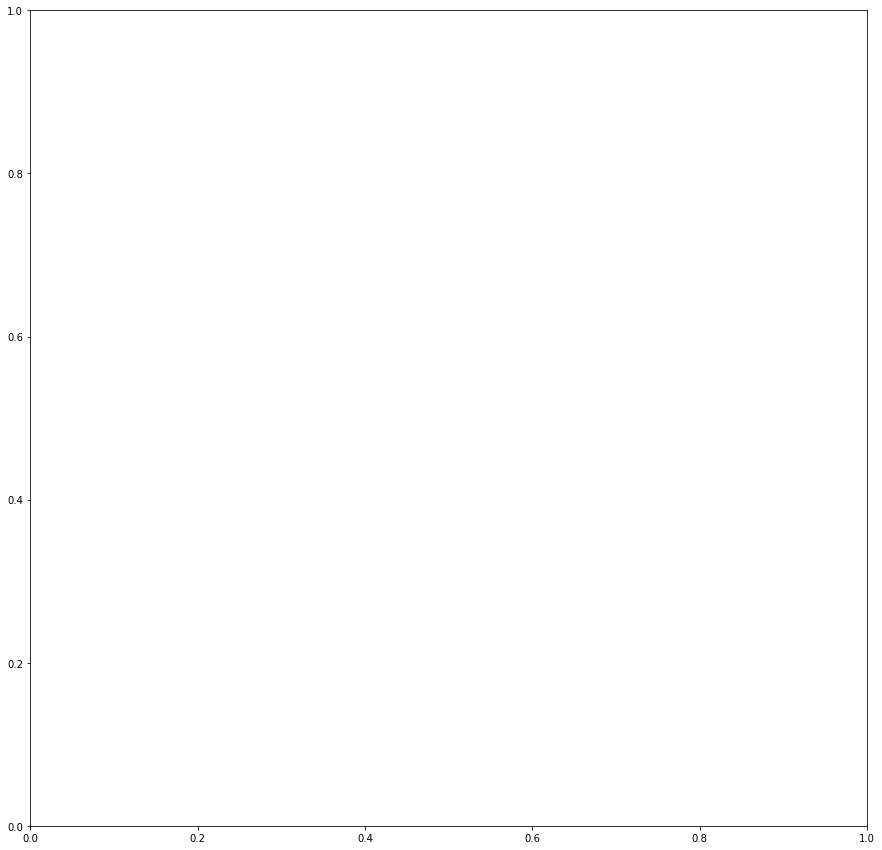

In [21]:
# Create subplot using matplotlib
f,ax = plt.subplots(figsize=(15,15))

In [22]:
# Create correlation heatmap in seaborn for public institutions
public_corr = sns.heatmap(public.corr(), annot = True, ax = ax)

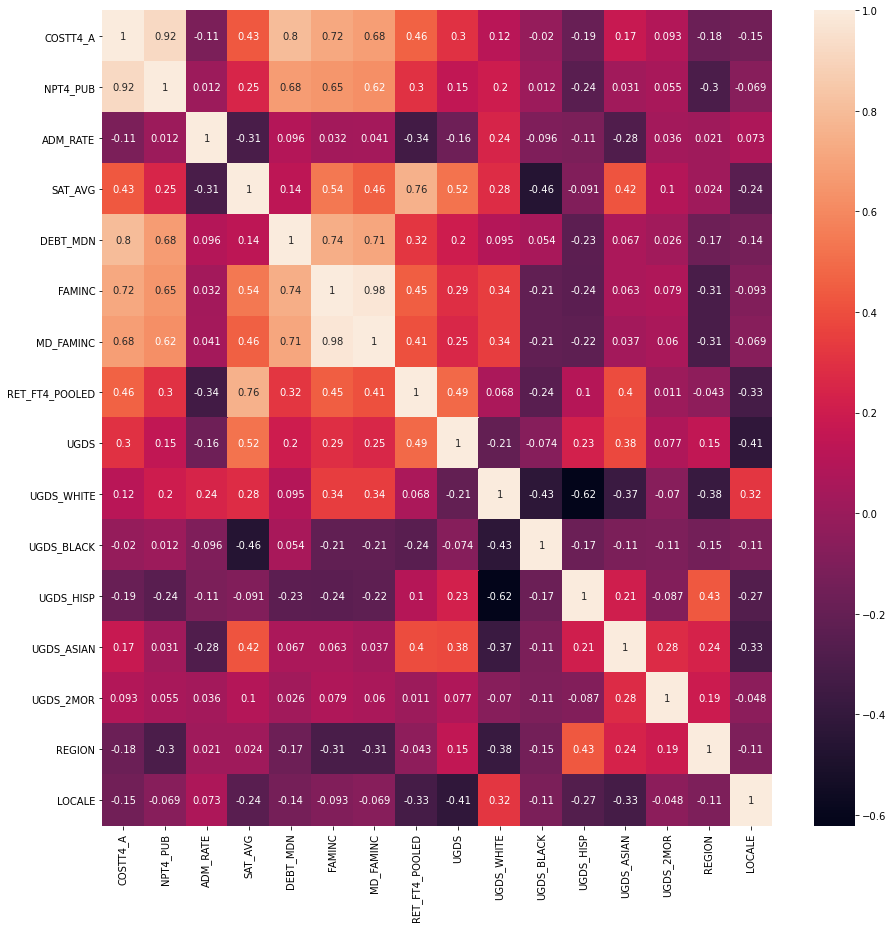

In [23]:
# Show the heatmap
public_corr.figure

The average cost of attendance (COSTT4_A) has a strong positive relationship (0.92) with the average net price (NPT4_PUB), which makes sense. It also has a strong positive relationship with the median amount of debt (DEBT_MDN) at 0.8, as well as average family income (FAMINC) at 0.72 and median family income (MD_FAMINC) at 0.68. It has a moderate positive relationship with average SAT score of admitted students (SAT_AVG) at 0.43, as well as retention rate (RET_FT4_POOLED) at 0.46. Otherwise, cost has a weak to no relationship with all of the other variables (admission rate, number of undergrad students enrolled, percentage of different demographics enrolled).

The admissions rate (ADM_RATE) has a moderate negative relationship with average SAT score of admitted students at -0.31, as well as with retention rate at -0.34.

The average SAT score of admitted students (SAT_AVG) has a strong positive relationship with retention rate at 0.76. It has a moderate positive relationship with average family income (0.54 - pretty close to median family income at 0.46), as well as number of undergrad students enrolled (0.52). It also has a moderate positive relationship with percent of Asian undergrad students enrolled (UGDS_ASIAN) at 0.42, and a moderate negative relationship with percent of Black undergrad students enrolled (UGDS_BLACK) at -0.46.

The median amount of debt (DEBT_MDN) has a strong positive relationship with the following variables: average cost of attendance (0.8), average net price (0.68), average family income (0.74), and median family income (0.71). It also has a moderate positive relationship with retention rate at 0.32.

The average family income (FAMINC) has a strong positive relationship with average cost of attendance, average net price, median amount of debt, and average SAT score, as seen above, but also median family income at 0.98 (which makes sense). It has a moderate positive relationship with retention rate (0.45) and percent of white undergrad students enrolled (0.34).

The retention rate has a strong positive relationship with average SAT score of admitted students at 0.76. It has a moderate positive relationship with average cost of attendance (0.46), average net price (0.3), median debt (0.32), average family income (0.45) and median family income (0.41), number of undergrad students enrolled (0.49), and percent of Asian undergrad students enrolled (0.4). It also has a moderate negative relationship with admissions rate (-0.34).

The size of the school (number of undergrad students enrolled - UGDS) has a moderate positive relationship with average cost of attendance (0.3), average SAT score of enrolled students (0.52), retention rate (0.49), and percent of Asian undergrad students (0.38).

The percent of white undergrad students (UGDS_WHITE) has a moderate positive relationship with average family income (0.34) and median family income (0.34). It also has a strong negative relationship with percent of Hispanic students (UGDS_HISP) at -0.62, and a moderate negative relationship with percent of Black students (-0.43) and percent of Asian students (-0.37).

The percent of black undergrad students (UGDS_BLACK) has a moderate negative relationship with average SAT scores at -0.46.

Region and locale are categorical variables, so it doesn't make sense to look at correlations with them.

### 02. Private non-profit

In [24]:
# Create correlation matrix for private using pandas
private.corr()

COSTT4_A  NPT4_PRIV  ADM_RATE   SAT_AVG  DEBT_MDN    FAMINC  \
COSTT4_A        1.000000   0.761110 -0.336712  0.767360  0.534447  0.817673   
NPT4_PRIV       0.761110   1.000000 -0.154633  0.443482  0.447844  0.644956   
ADM_RATE       -0.336712  -0.154633  1.000000 -0.489104  0.086942 -0.218268   
SAT_AVG         0.767360   0.443482 -0.489104  1.000000  0.193426  0.730890   
DEBT_MDN        0.534447   0.447844  0.086942  0.193426  1.000000  0.546066   
FAMINC          0.817673   0.644956 -0.218268  0.730890  0.546066  1.000000   
MD_FAMINC       0.729795   0.577710 -0.137795  0.611562  0.550809  0.970621   
RET_FT4_POOLED  0.528802   0.332031 -0.254075  0.803255  0.443604  0.574653   
UGDS            0.262641   0.242445 -0.133502  0.374011  0.060706  0.193038   
UGDS_WHITE      0.102861   0.086017  0.168116  0.105138  0.269607  0.411566   
UGDS_BLACK     -0.226079  -0.104399 -0.046092 -0.446455 -0.143424 -0.348893   
UGDS_HISP      -0.165111  -0.216930 -0.005434 -0.052060 -0.280358 -0.300561   
UGDS_ASIAN      0.384716   0.214776 -0.246742  0.580287  0.146018  0.154090   
UGDS_2MOR       0.323540   0.298089 -0.144901  0.237121  0.100881  0.205526   
REGION         -0.209621  -0.156415  0.008435 -0.124632 -0.269692 -0.296877   
LOCALE         -0.033299  -0.091649  0.015500 -0.177031 -0.074501  0.036132   

                MD_FAMINC  RET_FT4_POOLED      UGDS  UGDS_WHITE  UGDS_BLACK  \
COSTT4_A         0.729795        0.528802  0.262641    0.102861   -0.226079   
NPT4_PRIV        0.577710        0.332031  0.242445    0.086017   -0.104399   
ADM_RATE        -0.137795       -0.254075 -0.133502    0.168116   -0.046092   
SAT_AVG          0.611562        0.803255  0.374011    0.105138   -0.446455   
DEBT_MDN         0.550809        0.443604  0.060706    0.269607   -0.143424   
FAMINC           0.970621        0.574653  0.193038    0.411566   -0.348893   
MD_FAMINC        1.000000        0.538840  0.162732    0.452679   -0.342028   
RET_FT4_POOLED   0.538840        1.000000  0.178626    0.230139   -0.341336   
UGDS             0.162732        0.178626  1.000000   -0.006435   -0.057134   
UGDS_WHITE       0.452679        0.230139 -0.006435    1.000000   -0.495751   
UGDS_BLACK      -0.342028       -0.341336 -0.057134   -0.495751    1.000000   
UGDS_HISP       -0.307170       -0.072532  0.014756   -0.547721   -0.127293   
UGDS_ASIAN       0.091946        0.270270  0.087357   -0.241753   -0.127946   
UGDS_2MOR        0.157258        0.102206  0.072135   -0.024626   -0.079627   
REGION          -0.316359       -0.183729 -0.030352   -0.410813    0.018359   
LOCALE           0.071769       -0.125782 -0.070326    0.155784   -0.082413   

                UGDS_HISP  UGDS_ASIAN  UGDS_2MOR    REGION    LOCALE  
COSTT4_A        -0.165111    0.384716   0.323540 -0.209621 -0.033299  
NPT4_PRIV       -0.216930    0.214776   0.298089 -0.156415 -0.091649  
ADM_RATE        -0.005434   -0.246742  -0.144901  0.008435  0.015500  
SAT_AVG         -0.052060    0.580287   0.237121 -0.124632 -0.177031  
DEBT_MDN        -0.280358    0.146018   0.100881 -0.269692 -0.074501  
FAMINC          -0.300561    0.154090   0.205526 -0.296877  0.036132  
MD_FAMINC       -0.307170    0.091946   0.157258 -0.316359  0.071769  
RET_FT4_POOLED  -0.072532    0.270270   0.102206 -0.183729 -0.125782  
UGDS             0.014756    0.087357   0.072135 -0.030352 -0.070326  
UGDS_WHITE      -0.547721   -0.241753  -0.024626 -0.410813  0.155784  
UGDS_BLACK      -0.127293   -0.127946  -0.079627  0.018359 -0.082413  
UGDS_HISP        1.000000    0.004301  -0.078032  0.454913 -0.127760  
UGDS_ASIAN       0.004301    1.000000   0.139857  0.081359 -0.166325  
UGDS_2MOR       -0.078032    0.139857   1.000000  0.154405 -0.056747  
REGION           0.454913    0.081359   0.154405  1.000000 -0.072225  
LOCALE          -0.127760   -0.166325  -0.056747 -0.072225  1.000000

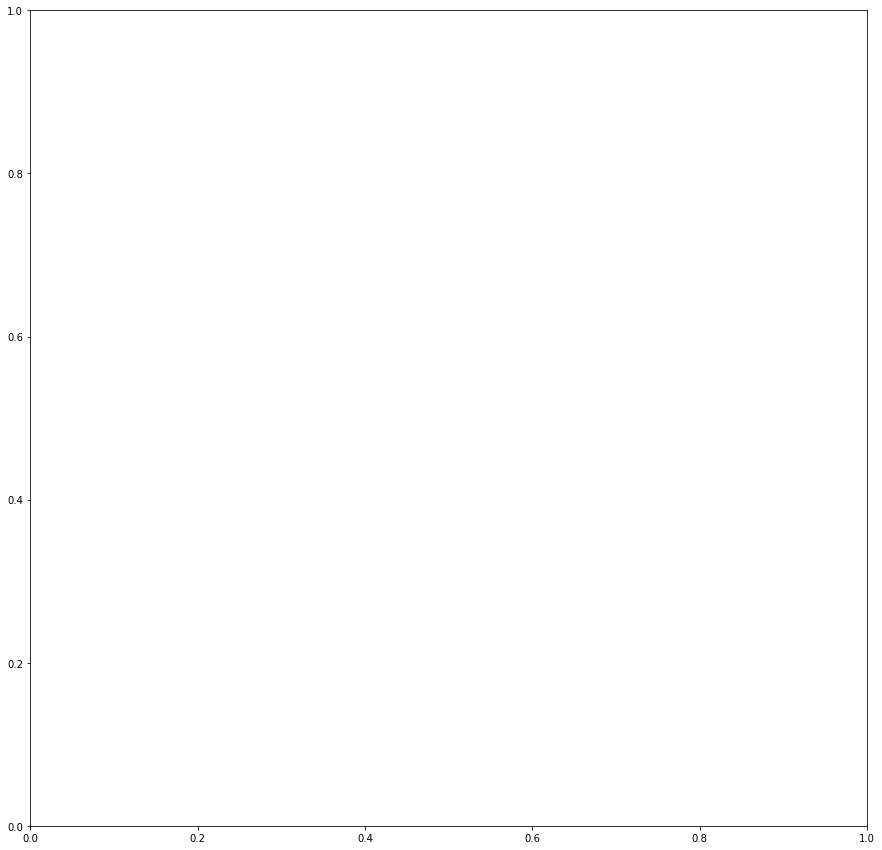

In [25]:
# Create subplot using matplotlib
f,ax = plt.subplots(figsize=(15,15))

In [26]:
# Create correlation heatmap in seaborn for private non-profit institutions
private_corr = sns.heatmap(private.corr(), annot = True, ax = ax)

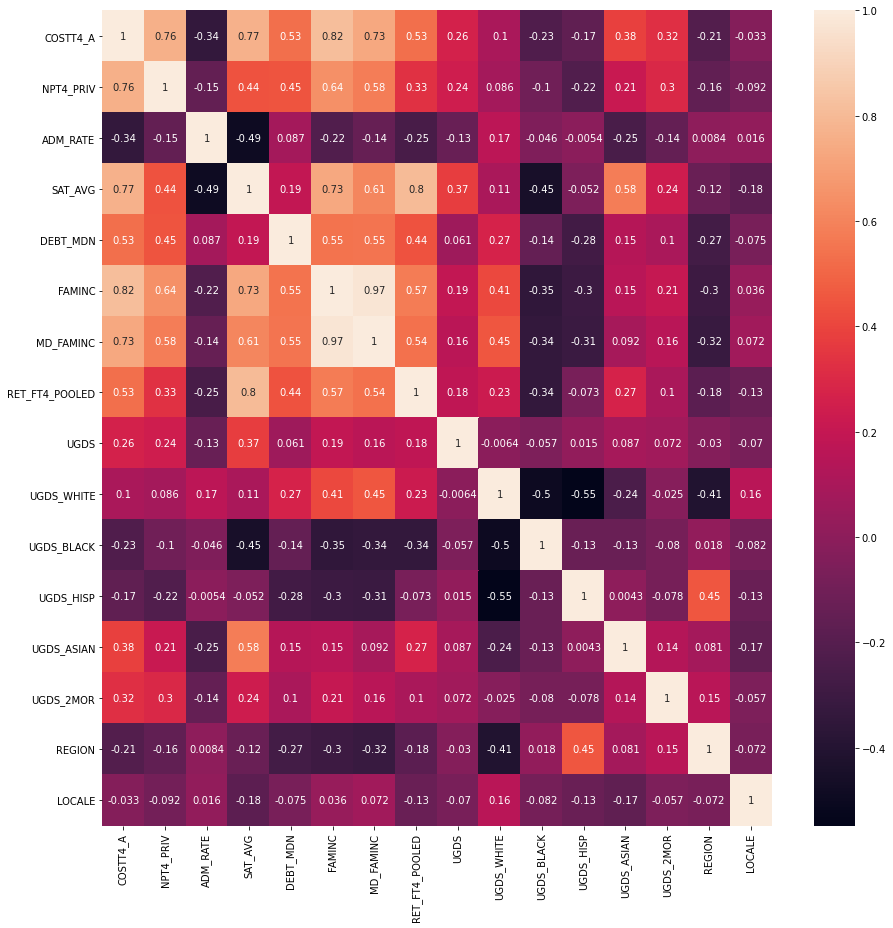

In [27]:
# Show the heatmap
private_corr.figure

The average cost of attendance (COSTT4_A) has a strong positive relationship with average SAT score of enrolled students (0.77), average family income (0.82), median family income (0.73), average net price (0.76 - which makes sense), median debt (0.53), and retention rate (0.53). It has a moderate positive relationship with percent of Asian undergrad students (0.38) and percent of undergrad students who are two or more races (0.32). It has a moderate negative relationship with admissions rate (-0.34). 

The admissions rate (ADM_RATE) has a moderate negative relationship with average SAT score (-0.49) as well as average cost of attendance (-0.34).

The average SAT score of enrolled students has a strong positive relationship with retention rate (0.8), average cost of attendance (0.77 - but surprisingly only moderate with average net price at 0.44), average family income (0.73) and median family income (0.61), and percent of Asian undergrad students (0.58). It has a moderate positive relationship with size (number of undergrads enrolled) at 0.37. It has a moderate negative relationship with percent of Black undergrads enrolled (-0.45).

The median debt (DEBT_MDN) has a moderate positive relationship with average cost of attendance (0.53), average net price (0.45), average family income (0.55) and median family income (0.55), and retention rate (0.44).

The average family income (FAMINC) has a strong positive relationship with average cost of attendance (0.82), average net price (0.64), average SAT score of enrolled students (0.73), retention rate (0.57), and median family income (0.97 - which makes sense). It has a moderate positive relationship with percent of white undergrad students (0.41).

The retention rate has a strong positive relationship with average SAT score of enrolled students (0.8). It has a moderate positive relationship with average cost of attendance (0.53), average net price (0.33), median debt (0.44), average family income (0.57), and median family income (0.54). It has a moderate negative relationship with percent of Black undergrad students (-0.34).

The school size (number of undergrad students enrolled) has a moderate positive relationship with average SAT score of enrolled students (0.37).

The percent of white undergrad students has a moderate positive relationship with median family income (0.45) and average family income (0.41). It has a moderate to strong negative relationship with percent of Hispanic students enrolled (-0.55) and percent of Black students enrolled (-0.5).

The percent of Black undergrad students has a moderate negative relationship with average SAT score of enrolled students (-0.45), average family income (-0.35) and median family income (-0.34), as well as retention rate (-0.34).

The percent of Asian undergrad students has a strong positive relationship with average SAT score of enrolled students (0.58) and a moderate positive relationship with average cost of attendance (0.38).

The percent of undergrad students with two or more races has a moderate positive relationship with average cost of attendance (0.32) and average net price (0.3).

Region and locale are categorical variables, so it doesn't make sense to look at correlations with them.

## 02. Scatterplots

### 01. Public

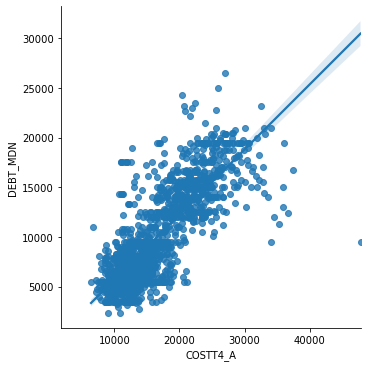

In [28]:
# Create scatterplot of average cost of attendance and median debt for public institutions
sns.lmplot(x = 'COSTT4_A', y = 'DEBT_MDN', data = public)

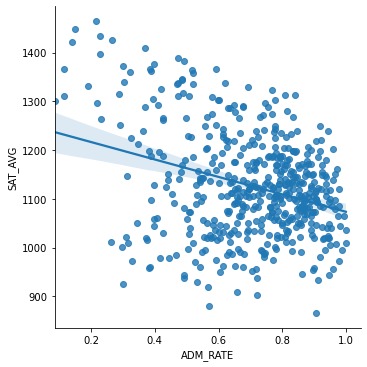

In [29]:
# Create scatterplot of admissions rate to average SAT score for public institutions
sns.lmplot(x = 'ADM_RATE', y = 'SAT_AVG', data = public)

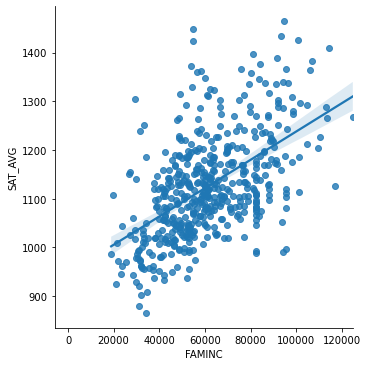

In [30]:
# Create scatterplot of average family income to average SAT score for public institutions
sns.lmplot(x = 'FAMINC', y = 'SAT_AVG', data = public)

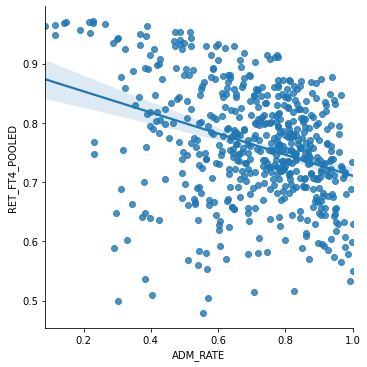

In [31]:
# Create scatterplot of admissions rate to retention rate for public institutions
sns.lmplot(x = 'ADM_RATE', y = 'RET_FT4_POOLED', data = public)

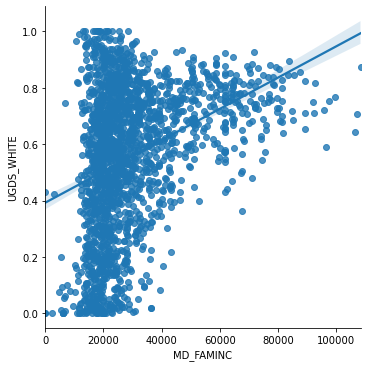

In [32]:
# Create a scatterplot of median family income to percent of white undergrad students for public institutions
sns.lmplot(x = 'MD_FAMINC', y = 'UGDS_WHITE', data = public)

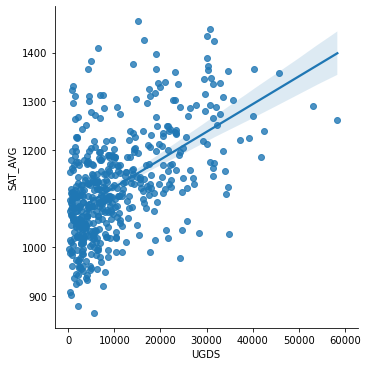

In [33]:
# Create scatterplot of size to average SAT score for public institutions
sns.lmplot(x = 'UGDS', y = 'SAT_AVG', data = public)

The relationship between average cost of attendance and median debt does seem to be linear, as well as the relationship between average family income and average SAT score. There is one odd outlier in the first with an average cost of attendance at about 50,000, but median debt of only about 10,000.

The relationship of admissions rate and average SAT score has high variance, as does the relationship between admissions rate and retention rate. 

As for median family income and percent of white undergrad students, it might be best to separate it into two: there doesn't seem to be any relationshp below 40,000, but there might be a linear relationship above 40,000.

The relationship between size and average SAT score seems to have high variance as well.

### 02. Private non-profit

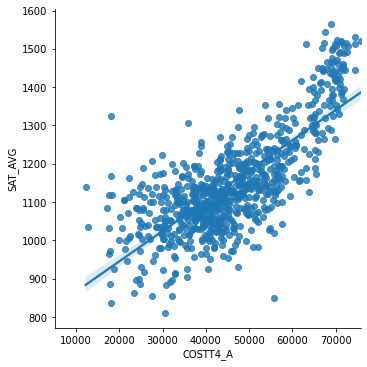

In [34]:
# Create scatterplot of average cost of attendance and average SAT scores for private institutions
sns.lmplot(x = 'COSTT4_A', y = 'SAT_AVG', data = private)

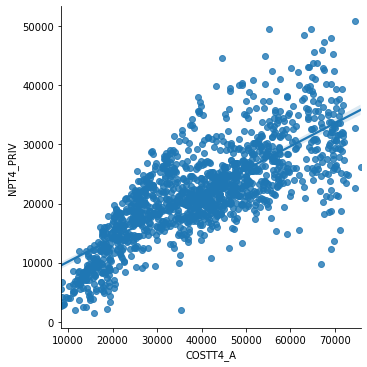

In [35]:
# Create scatterplot of average cost of attendance and median debt at private institutions
sns.lmplot(x = 'COSTT4_A', y = 'NPT4_PRIV', data = private)

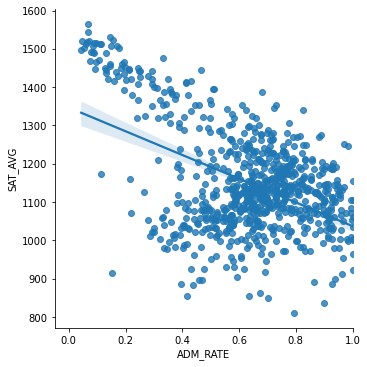

In [36]:
# Create scatterplot of admissions rate and average SAT score for private institutions
sns.lmplot(x = 'ADM_RATE', y = 'SAT_AVG', data = private)

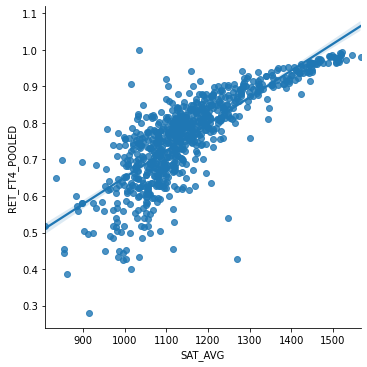

In [37]:
# Create scatterplot of average SAT score and retention rate for private institutions
sns.lmplot(x = 'SAT_AVG', y = 'RET_FT4_POOLED', data = private)

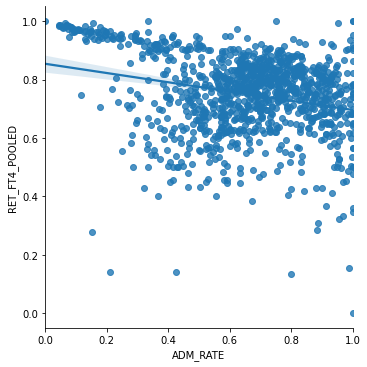

In [38]:
# Create scatterplot of admissions rate to retention rate for private institutions
sns.lmplot(x = 'ADM_RATE', y = 'RET_FT4_POOLED', data = private)

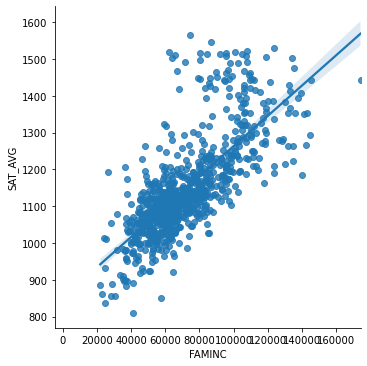

In [39]:
# Create scatterplot of average family income to average SAT score for private institutions
sns.lmplot(x = 'FAMINC', y = 'SAT_AVG', data = private)

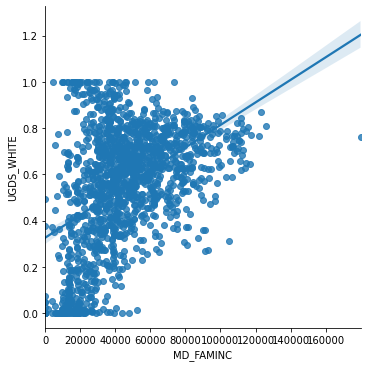

In [40]:
# Create scatterplot of median family income to percent of white undergrad students at private institutions
sns.lmplot(x = 'MD_FAMINC', y = 'UGDS_WHITE', data = private)

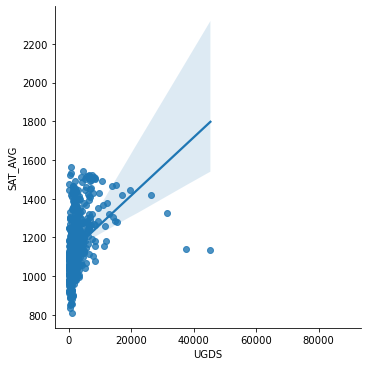

In [41]:
# Create scatterplot of size to average SAT score for private institutions
sns.lmplot(x = 'UGDS', y = 'SAT_AVG', data = private)

For average cost of attendance and average SAT score, it seems as though the points follow a more curved line. There are two outliers that stick out to me: one point is at an average cost of attendance of 55,000, but an average SAT score of 850; another has an average cost of 20,000, but an average SAT score just above 1300. Other scatterplots that seem to have this curved pattern are average SAT score and retention rate, as well as average cost of attendance and median debt. For this last one there is a curious outlier where average cost is 35,000, but median debt is only around 2,000.

The scatterplot of admissions rate and average SAT score is a strange shape. For admissions rate up to about 0.3, it could follow a negative linear line except for a few outliers. Otherwise there doesn't seem to be any pattern at all.

The scatterplot of admissions rate and retention rate has a high variance, as well as a number of outliers.

The relationship between average family income and average SAT score does seem to be linear, but with higher variance above income of 80,000.

The scatterplot of median family income and percent of white undergrads doesn't seem to follow a specific pattern either. One weird outlier though has a median family income of 180,000.

The last scatterplot of size and average SAT score has a large clumped almost vertical line on the left. This indicates that most private institutions have less than 20,000 students (and possibly even 10,000 students). It would be a good idea to eliminate likely outliers (size over 20,000) and re-plot the points to get a true grasp of the relationship.

## 03. Pair plots

It does not make sense to create a pair plot of the entire scorecard data set with 260 columns. Instead, I will create them for the public and private subsets.

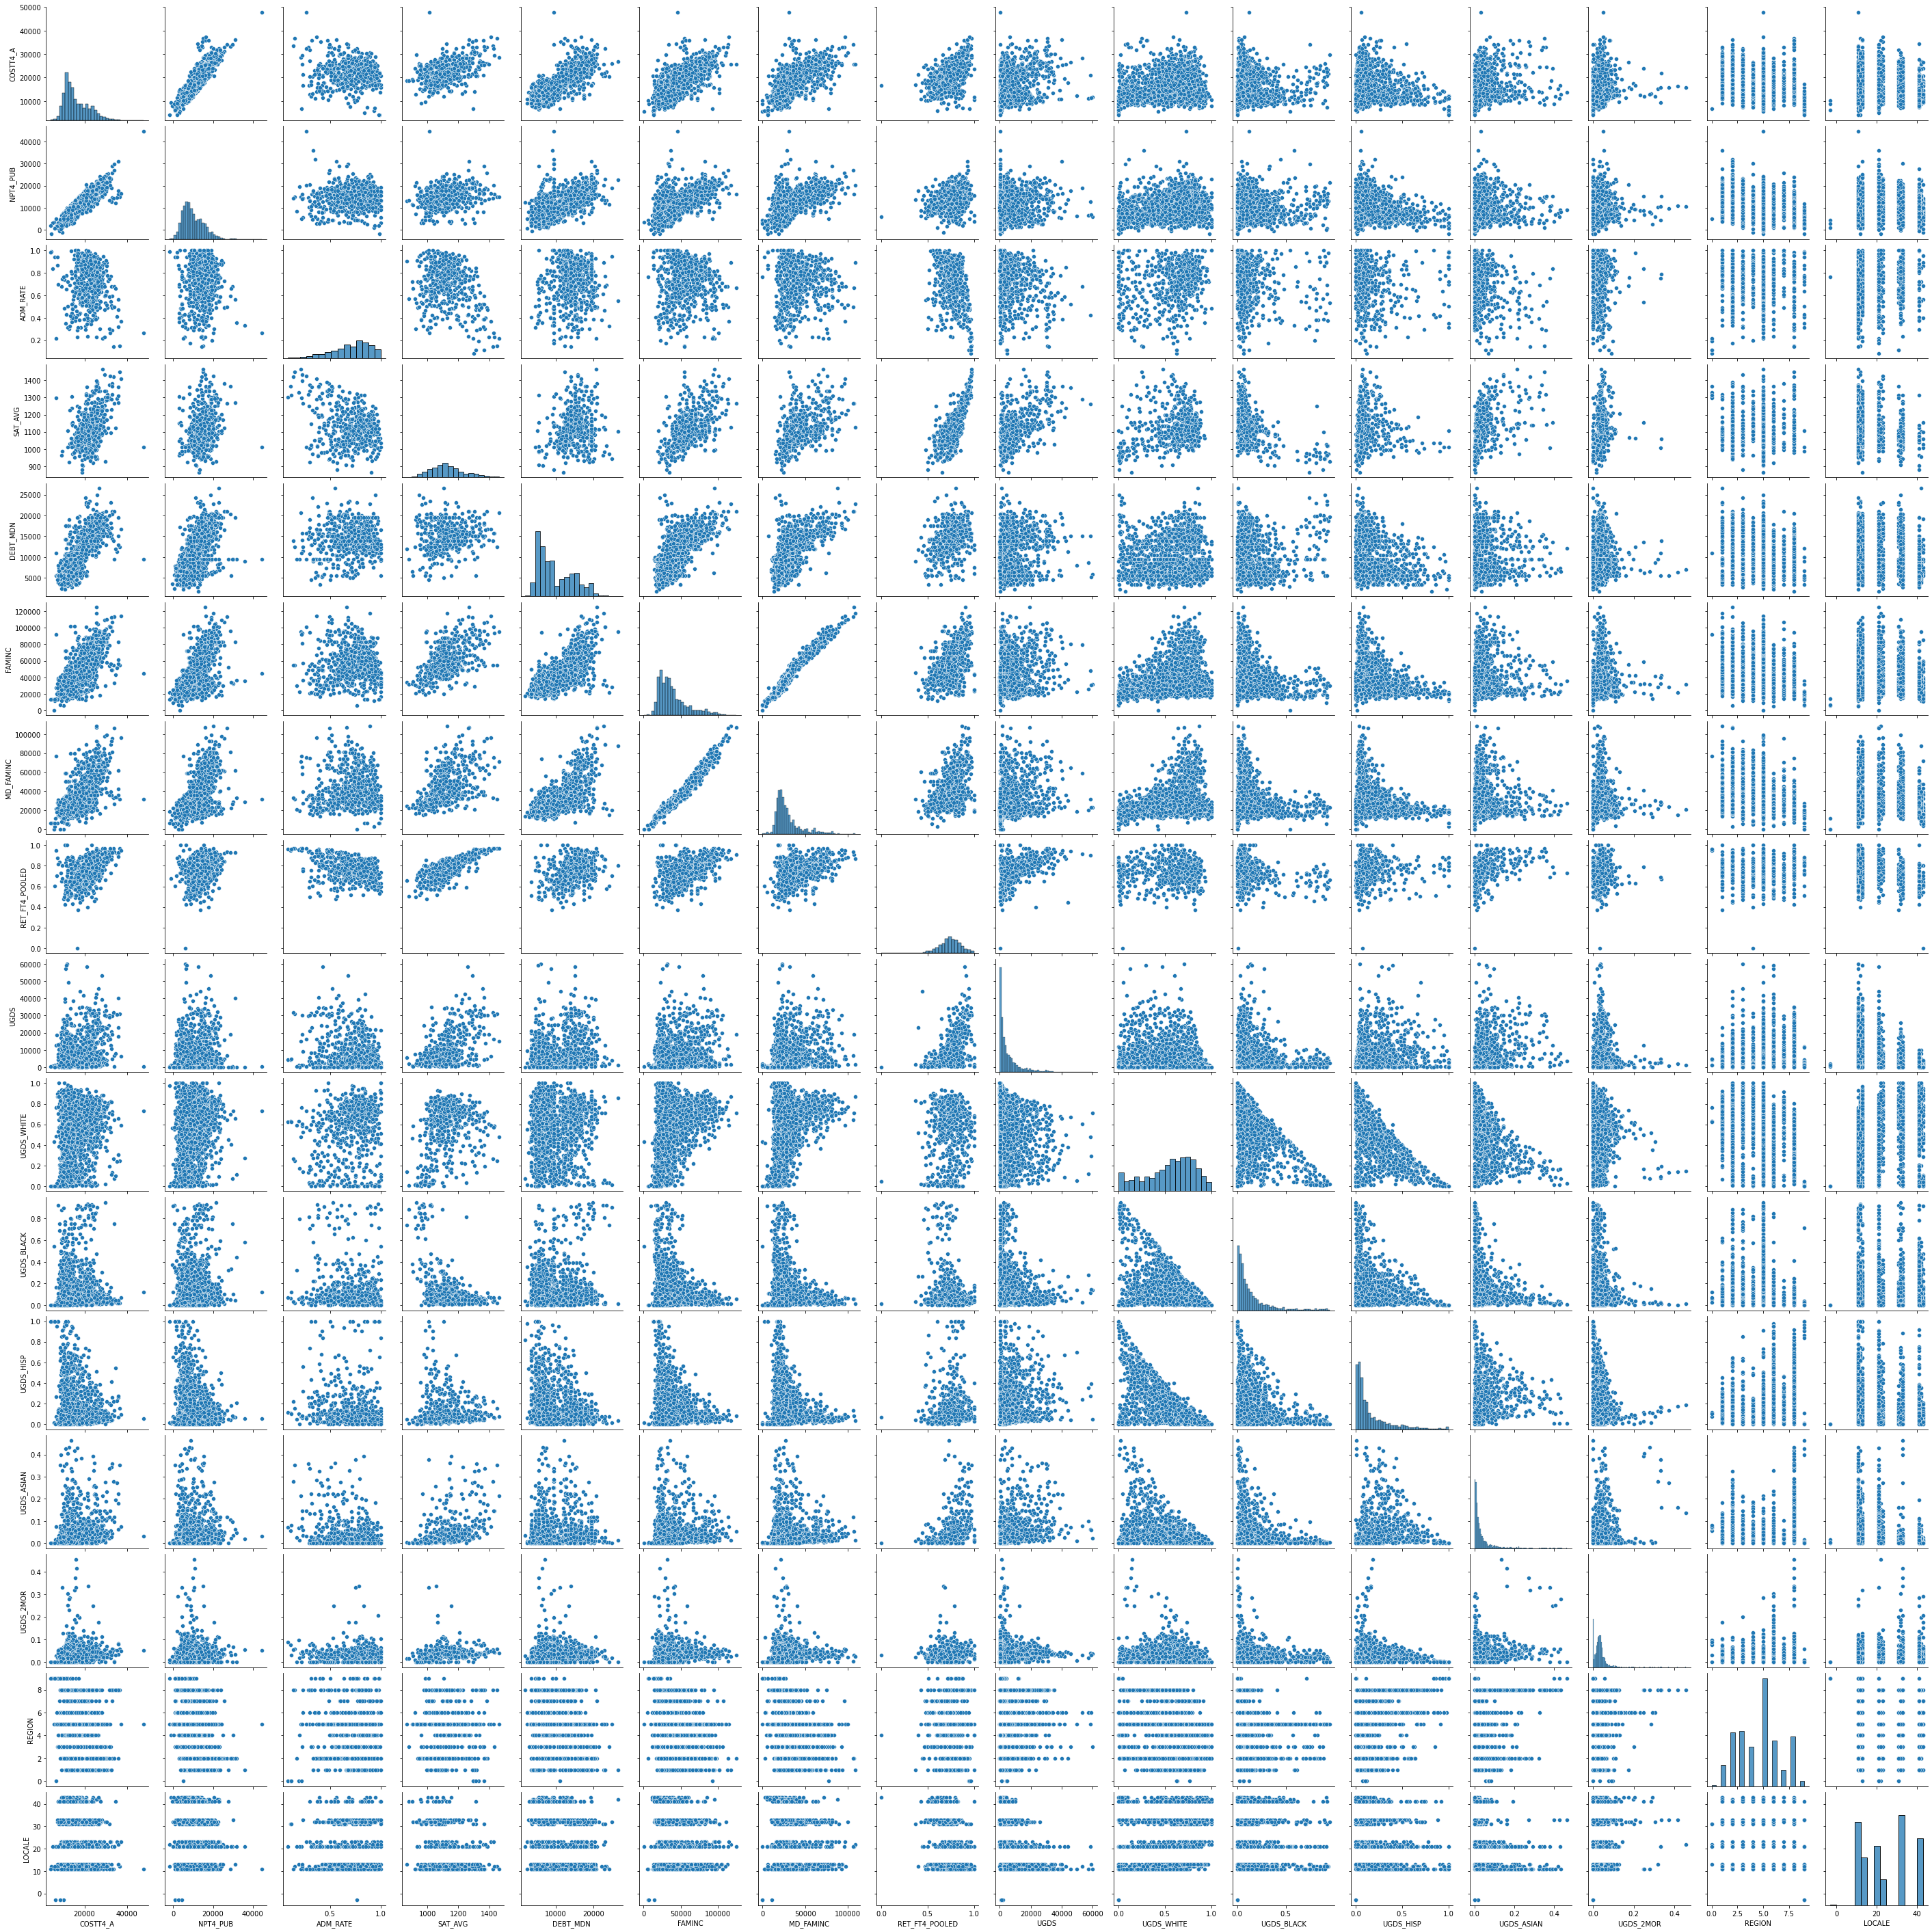

In [42]:
# Create pair plot for public dataframe
pub_pair = sns.pairplot(public)

For public institutions, the average cost of attendance and average net price are pretty similar with right-skewed distributions; most of the data points are to the left (usually lower cost/price). The distributions for average family income and median family income also look like this. The median debt distribution is more interesting: it is also right-skewed, but it has a very tall peak on the left and a shorter peak to its right. Admissions rate and average SAT score have distributions that are very short, however admissions rate is more left-skewed and average SAT score is more right-skewed. Retention rate appears to have a normal distribution (although it's a very small graph, so I could be missing outlier values on the left). The size distribution is highly right-skewed, as are the percentage of undergrads unrolled of all ethnicities except for white, which is a little bit left-skewed with a low peak.

The variables that I want to learn more about are median debt and percent of white undergrads enrolled, because they have the most unusual distributions. Otherwise I would like to keep going with the following variables: average cost of attendance, average family income, admissions rate, average SAT score, retention rate, and size.

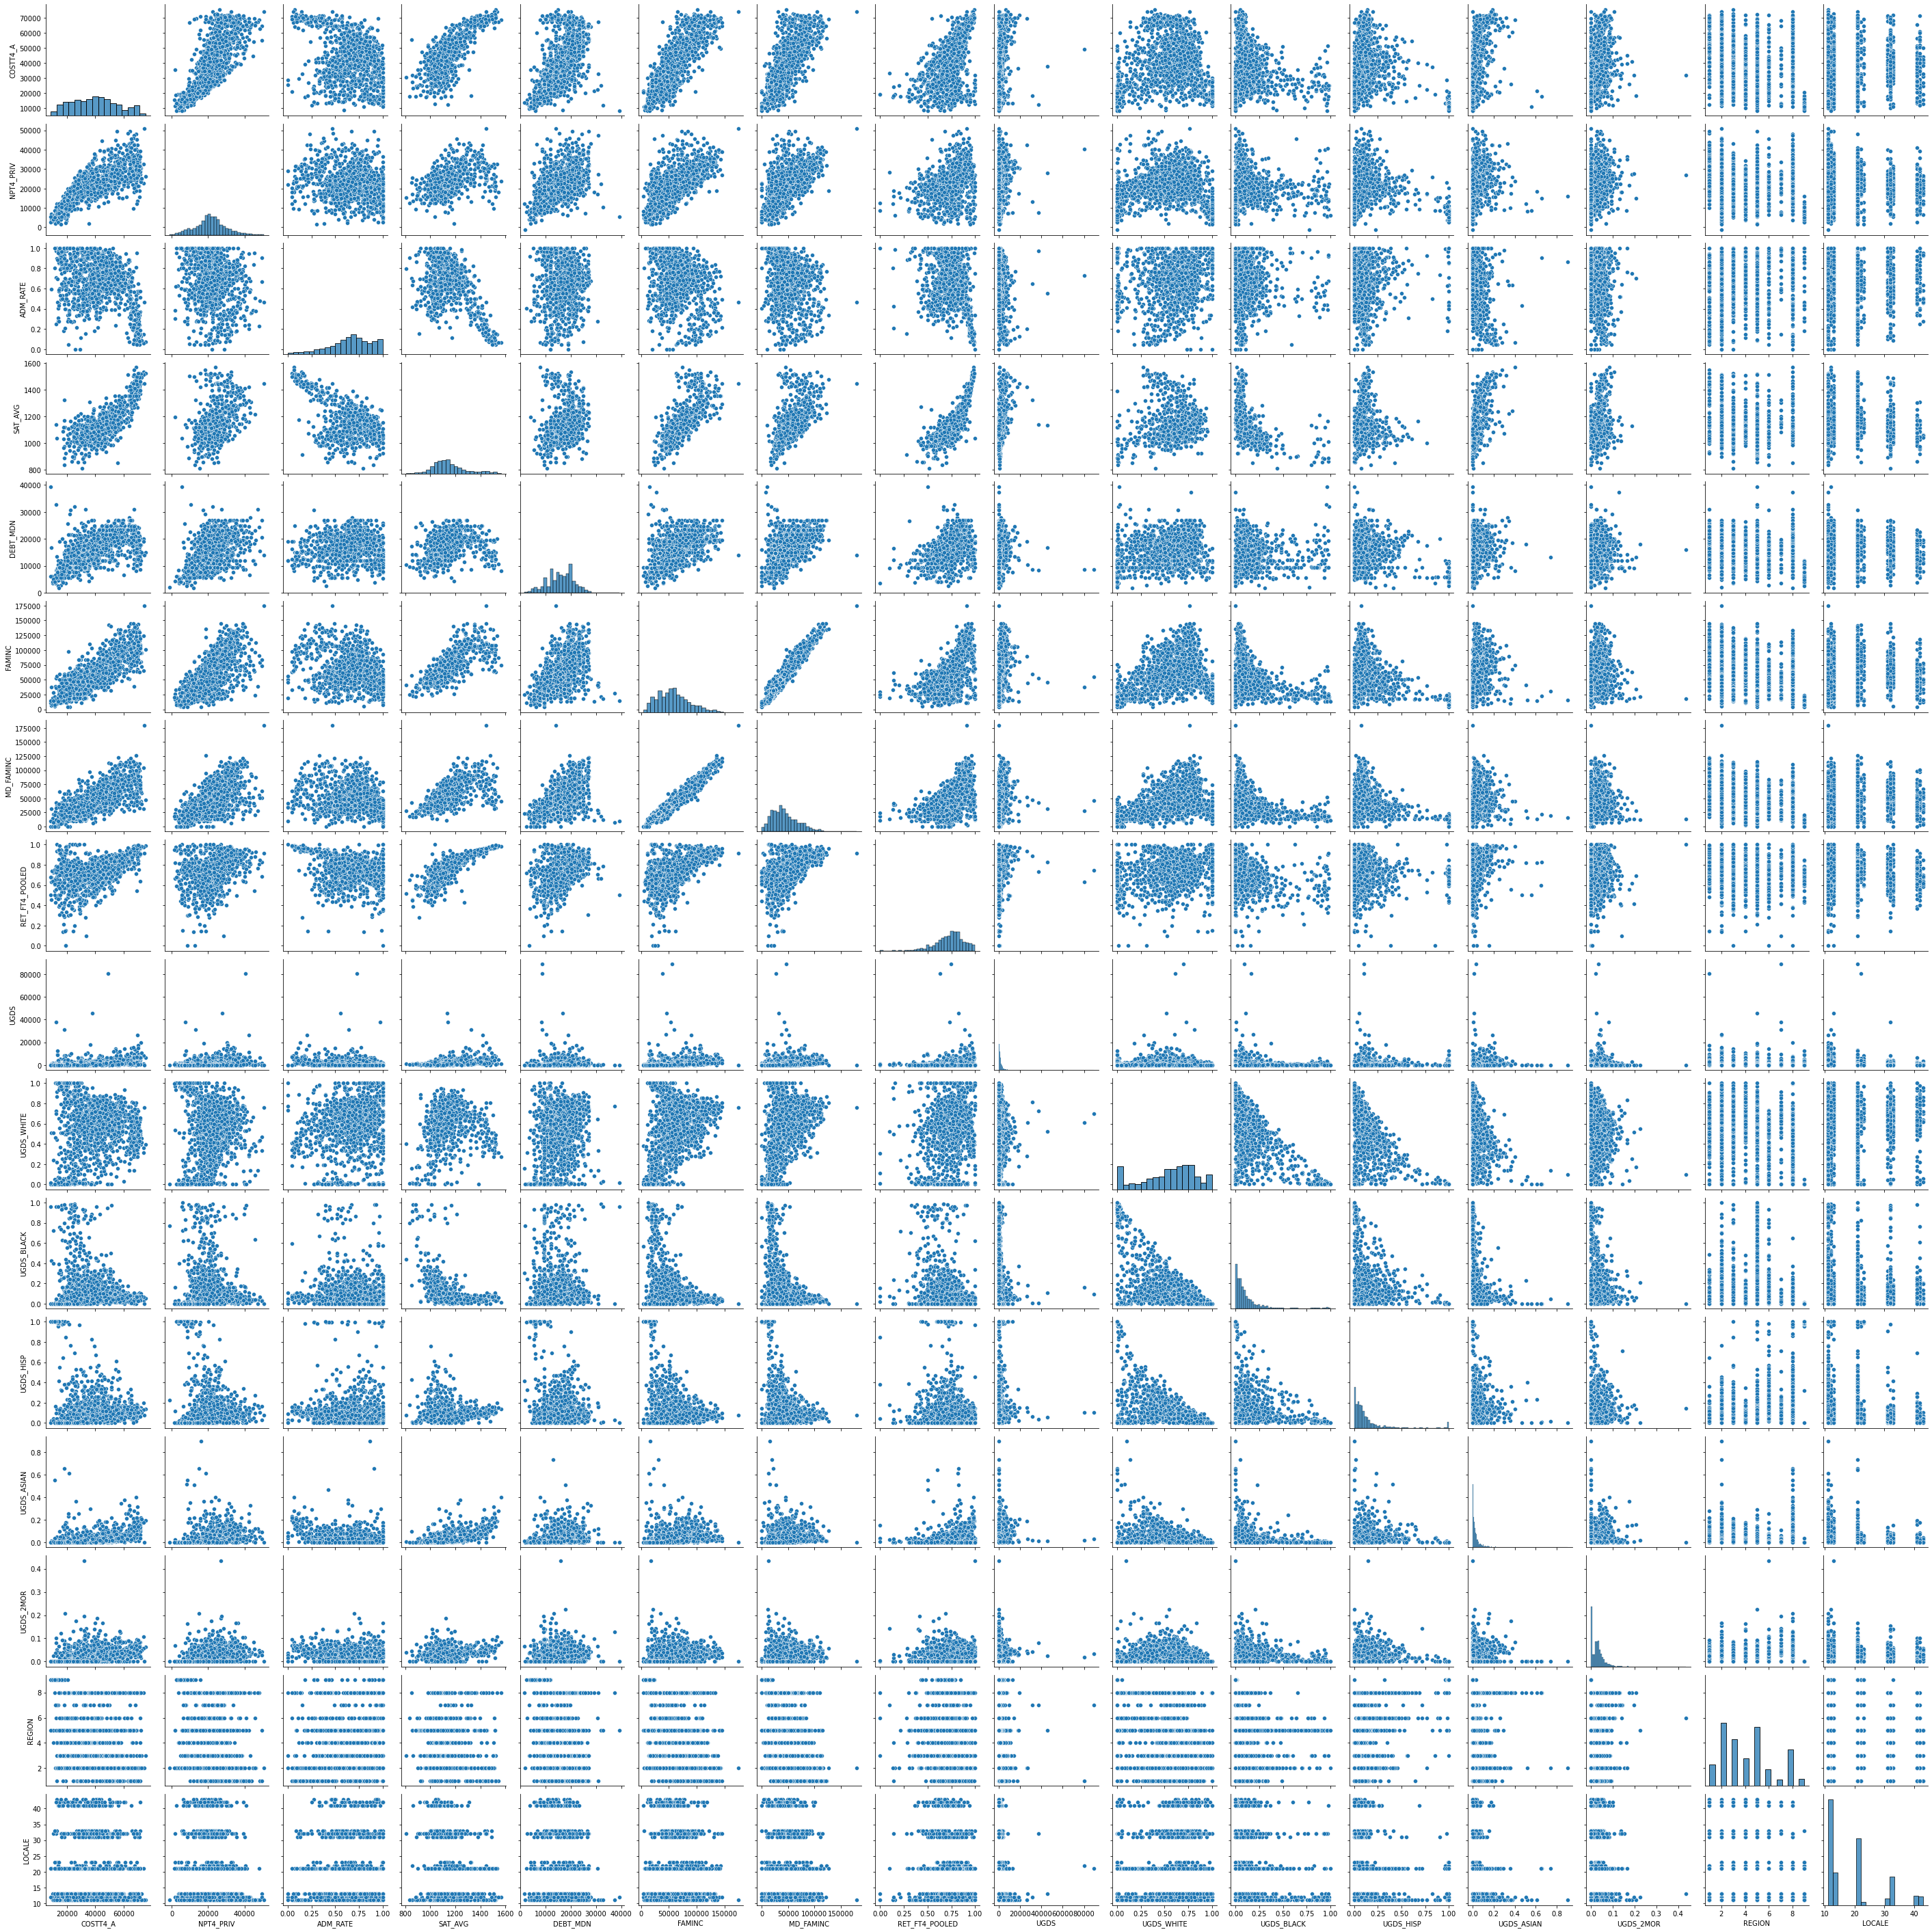

In [43]:
# Create pair plot for private dataframe
priv_pair = sns.pairplot(private)

The distribution of variables for private institutions is quite different from those for public institutions. The average cost of attendance is almost flat; it only has the slightest of peaks. However, average net price is pretty close to having a normal distribution, except it has a slight right-skew. The distributions for average family income and median family income are right-skewed, but have lower peaks than the same variables for public institutions. Admissions rate and average SAT score are left-skewed and right-skewed respectively. Median debt is interesting: there seem to be 2 values that are very common on either side of what would be the peak otherwise. Retention rate is highly left-skewed. Size seems highly right-skewed, but the graph is so small that it's hard to tell. The distributions for percent of undergrads enrolled of all ethnicities except white behave the same as at public institutions: right-skewed. The percent of white undergrads enrolled has a lot of observations with a low percentage, but then has a low peak on the right.

The variables that I want to learn more about are average cost of attendance, median debt, size, and percent of white undergrads enrolled because they have the most interesting/unusual distributions. Otherwise I would like to keep going with the following variables: average net price, average family income, admissions rate, average SAT score, and retention rate.

## 04. Categorical plots

### 01. Public

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COSTT4_A', ylabel='Density'>

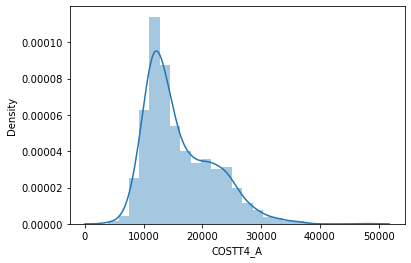

In [44]:
# Get a histogram of average cost of attendance
sns.distplot(public['COSTT4_A'], bins = 25)

In [45]:
# Create lower cost category
public.loc[public['COSTT4_A'] < 10000, 'cost_category'] = 'Lower cost'

In [46]:
# Create middle cost category
public.loc[(public['COSTT4_A'] >= 10000) & (public['COSTT4_A'] < 20000), 'cost_category'] = 'Middle cost'

In [47]:
# Create higher cost category
public.loc[public['COSTT4_A'] >= 20000, 'cost_category'] = 'Higher cost'

In [48]:
# Get value counts of cost_category
public['cost_category'].value_counts(dropna = False)

Middle cost    1067
NaN             488
Higher cost     403
Lower cost      144
Name: cost_category, dtype: int64

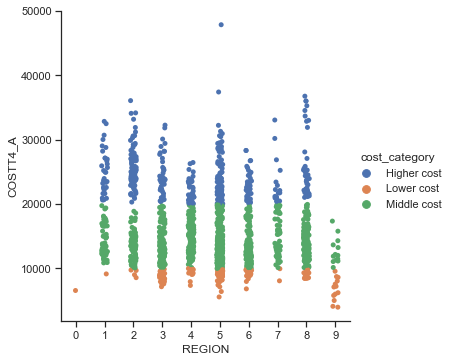

In [49]:
# Create categorical plot using cost_category and region
sns.set(style = 'ticks')
reg_cost_cat = sns.catplot(x = 'REGION', y = 'COSTT4_A', hue = 'cost_category', data = public)

This categorical plot tells us that public institutions of different cost categories are spread out fairly equally among regions EXCEPT there are no higher cost public institutions in region 9 (Outlying areas = US territories), and there are very few lower cost institutions in regions 1 (New England), 2 (Mid-East = Mid-Atlantic), and 7 (Rocky Mountains).

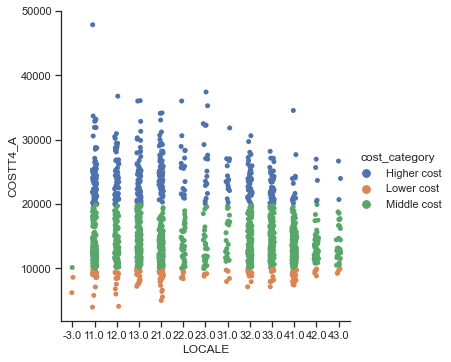

In [50]:
# Create categorical plot using cost_category and locale
sns.set(style = 'ticks')
loc_cost_cat = sns.catplot(x = 'LOCALE', y = 'COSTT4_A', hue = 'cost_category', data = public)

This categorical plot tells us that public institutions of different cost categories are spread out fairly equally amont different locales (city, suburb, town, rural) EXCEPT there are very few higher cost and lower cost public institutions in locales 42 and 43 (two rural categories). There also seem to be fewer lower cost public institutions in locales of 22 and 23 (two suburban categories), as well as 31 (a town category).

Unfortunately, -3 is not listed in the data dictionary, so it's unknown that that is supposed to represent.

### 02. Private non-profit

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COSTT4_A', ylabel='Density'>

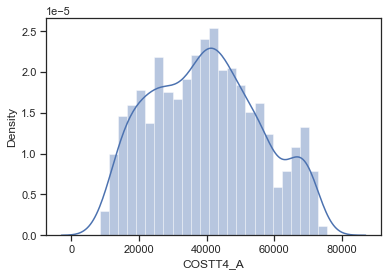

In [51]:
# Get a histogram of average cost of attendance
sns.distplot(private['COSTT4_A'], bins = 25)

In [52]:
# Create lower cost category
private.loc[private['COSTT4_A'] < 20000, 'cost_category'] = 'Lower cost'

In [53]:
# Create middle cost category
private.loc[(private['COSTT4_A'] >= 20000) & (private['COSTT4_A'] < 55000), 'cost_category'] = 'Middle cost'

In [54]:
# Create higher cost category
private.loc[private['COSTT4_A'] >= 55000, 'cost_category'] = 'Higher cost'

In [55]:
# Get value counts of cost_category column
private['cost_category'].value_counts(dropna = False)

Middle cost    941
NaN            630
Higher cost    258
Lower cost     177
Name: cost_category, dtype: int64

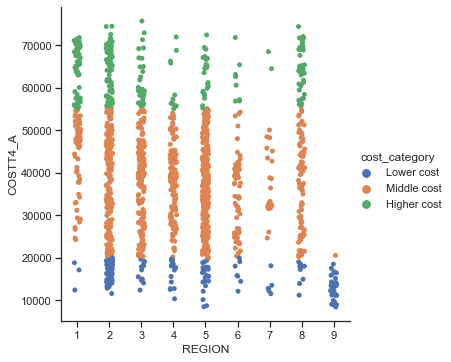

In [56]:
# Create categorical plot using cost_category and region
sns.set(style = 'ticks')
reg_cost_cat_priv = sns.catplot(x = 'REGION', y = 'COSTT4_A', hue = 'cost_category', data = private)

This categorical plot tells us that lower cost private institutions appear most frequently in regions 2 (Mid-East = Mid-Atlantic) and 9 (Outlying areas = US territories), but there are very few in regions 1 (New England) and 7 (Rocky Mountains). Middle cost private institutions appear pretty equally throughout all regions except for 9 (US territories), where there is only one of them. Higher cost private institutions appear pretty frequently in regions 1 (New England), 2 (Mid-Atlantic), and 8 (Far West); don't appear at all in 9 (US territories); and appear only a few times in 6 (Southwest) and 7 (Rocky Mountains).

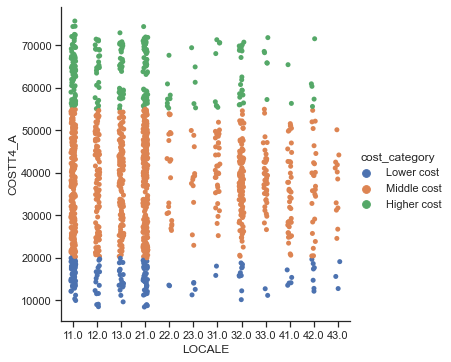

In [57]:
# Create categorical plot using cost_category and locale
sns.set(style = 'ticks')
loc_cost_cat_priv = sns.catplot(x = 'LOCALE', y = 'COSTT4_A', hue = 'cost_category', data = private)

This categorical plot tell us that all cost categories appear the most in locales of 11, 12, 13 (city categories) and 21 (a suburban category). There are a lot of middle cost private institutions in locale of 32 (a town category), and they appear throughout all of the other locale categories as well. However, there are very few higher cost and lower cost private institutions in any of the categories (suburban, town, and rural).

# 05. Revisit questions

## 01. Cost/price

For public institutions: ones with a higher average cost do have a higher average net price and higher median debt for students. A higher average cost also seems to indicate a slightly higher average SAT score and slightly higher average family income. Cost doesn't really have anything to do with location, admissions rate, size, diversity, or retention rate.

For private institutions: ones with a higher average cost definitely have a higher average net price, higher average SAT score, higher average family income, higher median debt, and higher retention rate. Cost doesn't really have anything to do with size, diversity, or admissions rate.

Why do private institutions with a higher average cost have a higher retention rate, but public institutions with a higher average cost don't?

Why do private institutions with a higher average cost have higher average SAT scores, while this relationship is less strong for public institutions?

## 02. Admissions

For public institutions: a lower admissions rate only indicates a higher average SAT score at the lowest end of the spectrum (schools with the lowest admissions rates).

For private institutions: a lower admissions rate does seem to indicate a higher average SAT score, however it's very strong at the lowest end (schools with lowest admissions rates) and there's a lot more variance in terms of lower SAT scores at the highest end (schools with highest admissions rates).

Why is there so much variance in average SAT scores at institutions with higher admissions rates (both public and private institutions)?

## 03. Students

For public institutions: ones with higher average family incomes actually seem to have higher median debt levels. The visualizations above aren't enough to tell which public institutions have more diverse student bodies.

For private institutions: ones with higher average family incomes seem to have higher median debt levels, except for the highest average family incomes (who have much lower median debt). The visualizations above aren't enough to tell which private institutions have more diverse student bodies, but it is clear that private ones are much less diverse than public ones.

Why are private institutions much less diverse than public institutions?

# 06. Possible hypotheses

1. A private institution with a high average SAT score of enrolled students, high average family income of enrolled students, and high retention rate will have a high average cost.

2. A private institution will have a less diverse student body than a public institutions, as measured by percent of enrolled undergrads who are Black, Hispanic, Asian, or two or more ethnicities.